## **Indian House Price Analysis and Buliding Prediction Model.**

In [ ]:
## Importing the Dependencies.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


set = sns.axes_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Importing the House Price dataset

df = pd.read_csv('c:/Users/DELL/OneDrive/Desktop/House Price India.csv')

In [5]:
# Top 5 rows of dataset.
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6.762811e+09,5/1/2016,4,2.50,2920,4000,1.5,0,0,5,8,1910,1010,1909,0,122004,52.89,-114.47,2470,4000,2,51,1400000
1,6.762811e+09,5/1/2016,5,2.75,2910,9480,1.5,0,0,3,8,2910,0,1939,0,122004,52.89,-114.47,2940,6600,1,53,1200000
2,6.762813e+09,5/1/2016,4,2.50,3310,42998,2.0,0,0,3,9,3310,0,2001,0,122005,52.95,-114.32,3350,42847,3,76,838000
3,6.762813e+09,5/1/2016,3,2.00,2710,4500,1.5,0,0,4,8,1880,830,1929,0,122006,52.90,-114.49,2060,4500,1,51,805000
4,6.762813e+09,5/1/2016,3,2.50,2600,4750,1.0,0,0,4,9,1700,900,1951,0,122007,52.91,-114.59,2380,4750,1,67,790000


In [6]:
# Last 5 rows of dataset.
df.tail(2)

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
14617,6.762831e+09,12/30/2016,4,1.0,1030,6621,1.0,0,0,4,6,1030,0,1955,0,122042,52.72,-114.41,1420,6631,3,54,205000
14618,6.762831e+09,12/30/2016,3,1.0,900,4770,1.0,0,0,3,6,900,0,1969,2009,122018,52.53,-114.55,900,3480,2,55,146000


In [7]:
# Small summary of dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14619 non-null  float64
 1   Date                                   14619 non-null  object 
 2   number of bedrooms                     14619 non-null  int64  
 3   number of bathrooms                    14619 non-null  float64
 4   living area                            14619 non-null  int64  
 5   lot area                               14619 non-null  int64  
 6   number of floors                       14619 non-null  float64
 7   waterfront present                     14619 non-null  int64  
 8   number of views                        14619 non-null  int64  
 9   condition of the house                 14619 non-null  int64  
 10  grade of the house                     14619 non-null  int64  
 11  Ar

In [8]:
# Statistcal summary of the dataset.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,14619.0,6.762821e+09,6237.161975,6.762810e+09,6.762815e+09,6.762821e+09,6.762826e+09,6.762832e+09
number of bedrooms,14619.0,3.379233e+00,0.938655,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
number of bathrooms,14619.0,2.129557e+00,0.769955,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
living area,14619.0,2.098157e+03,928.218740,3.700000e+02,1.440000e+03,1.930000e+03,2.570000e+03,1.354000e+04
lot area,14619.0,1.509369e+04,37920.885355,5.200000e+02,5.010500e+03,7.620000e+03,1.080000e+04,1.074218e+06
number of floors,14619.0,1.502326e+00,0.540241,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront present,14619.0,7.661263e-03,0.087196,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
number of views,14619.0,2.328477e-01,0.765651,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition of the house,14619.0,3.430399e+00,0.664047,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
grade of the house,14619.0,7.682263e+00,1.174917,4.000000e+00,7.000000e+00,7.000000e+00,8.000000e+00,1.300000e+01


In [9]:
# Calculate statistics for the 'Price' column
# Reset index to get a DataFrame format
stats = df['Price'].describe().reset_index()
stats['Price'] = round(stats['Price'], 2)

In [10]:
# Check statistics of price.
stats

,index,Price
0,count,14619.00
1,mean,538806.28
2,std,367229.36
3,min,78000.00
4,25%,320000.00
5,50%,450000.00
6,75%,645000.00
7,max,7700000.00


In [11]:
# Check null values in the DataFrame
df.isna().sum().sum()

np.int64(0)

In [12]:
# Check Duplicates.
df.duplicated().sum()

np.int64(0)

In [15]:
# Check all columns of the dataset.

df.columns

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')

In [16]:
# Check shape of dataset.
df.shape


(14619, 23)

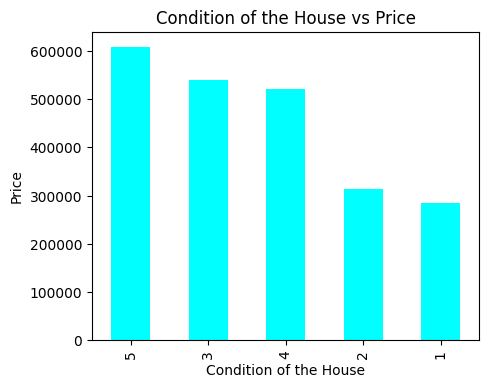

In [18]:
# Condition of the House vs Price

df.groupby('condition of the house')['Price'].mean().sort_values(ascending=False).plot(kind = 'bar', color = 'aqua', figsize=(5, 4))
plt.title('Condition of the House vs Price')
plt.ylabel('Price')
plt.xlabel('Condition of the House')
plt.show()

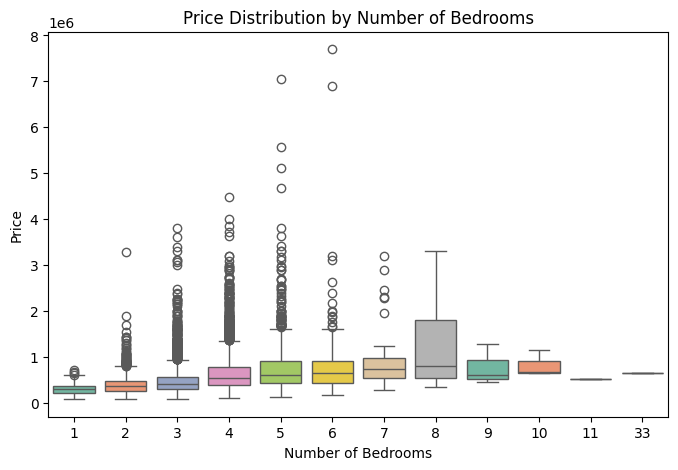

In [33]:
# Boxplot: Price distribution by number of bedrooms
plt.figure(figsize=(8, 5))
sns.boxplot(x='number of bedrooms', y='Price', data=df, palette='Set2')
plt.title('Price Distribution by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()


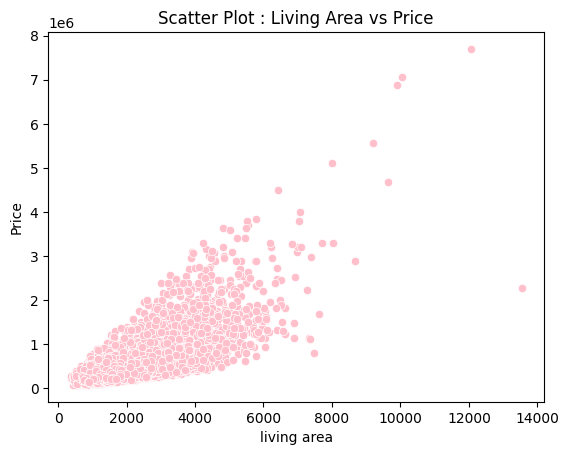

In [ ]:
# Scatter Plot : Living Area vs Price

sns.scatterplot(x = 'living area', y = 'Price', data =df, color = 'pink')
plt.title('Scatter Plot : Living Area vs Price')
plt.show()

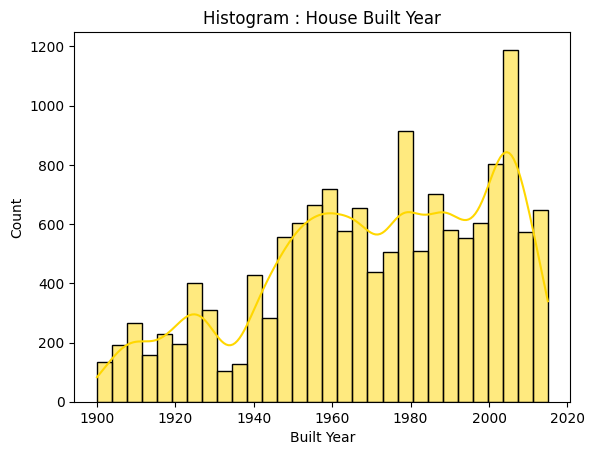

In [25]:
# Histogram : House Built Year

sns.histplot(df['Built Year'], kde = True, bins = 30, color = 'Gold')
plt.title("Histogram : House Built Year")
plt.show()

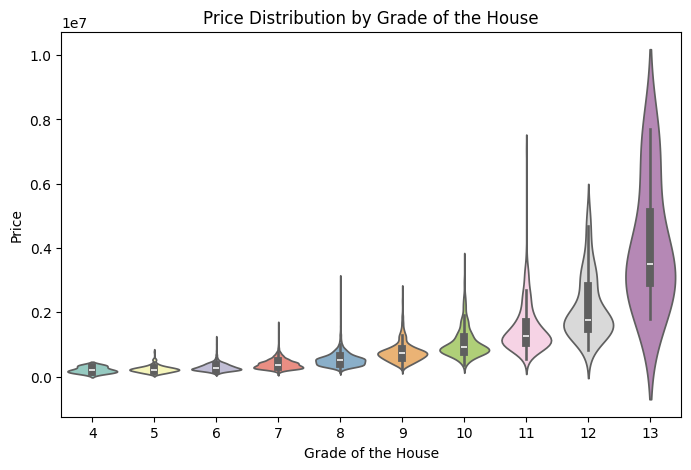

In [ ]:
# Violin plot: Price distribution by grade of the house

plt.figure(figsize=(8, 5))
sns.violinplot(x='grade of the house', y='Price', data=df, palette='Set3')
plt.title('Price Distribution by Grade of the House')
plt.xlabel('Grade of the House')
plt.ylabel('Price')
plt.show()


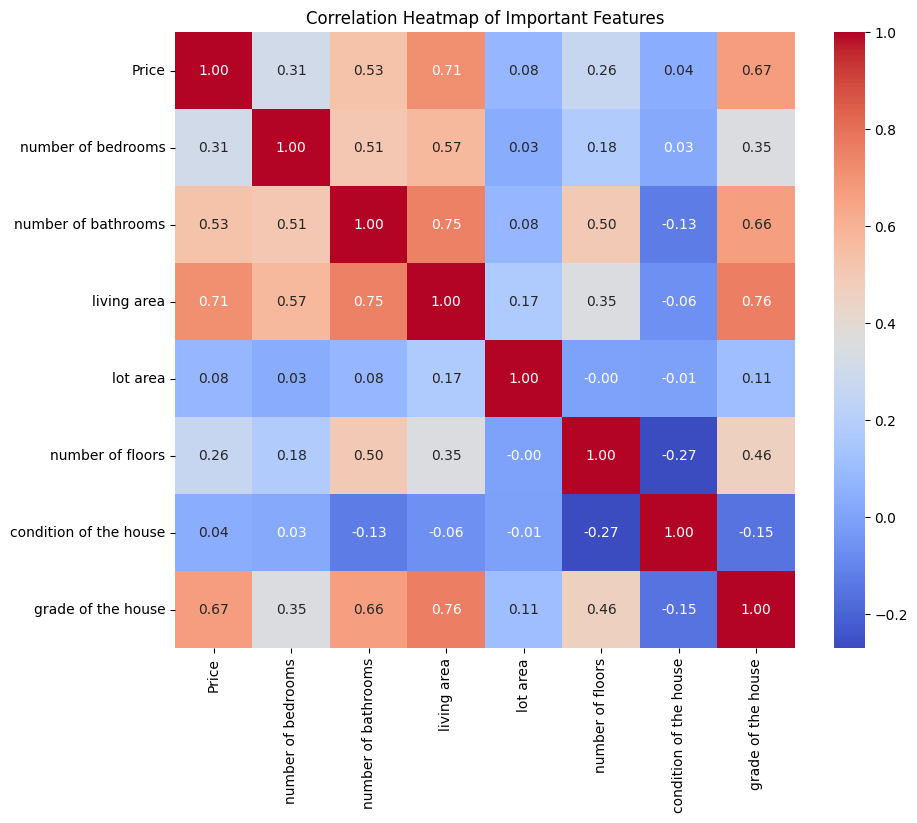

In [30]:
# Plot the correlation heatmap for important columns

important_cols = [
    'Price', 'number of bedrooms', 'number of bathrooms', 'living area',
    'lot area', 'number of floors', 'condition of the house',
    'grade of the house'
]

corr = df[important_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Important Features')
plt.show()

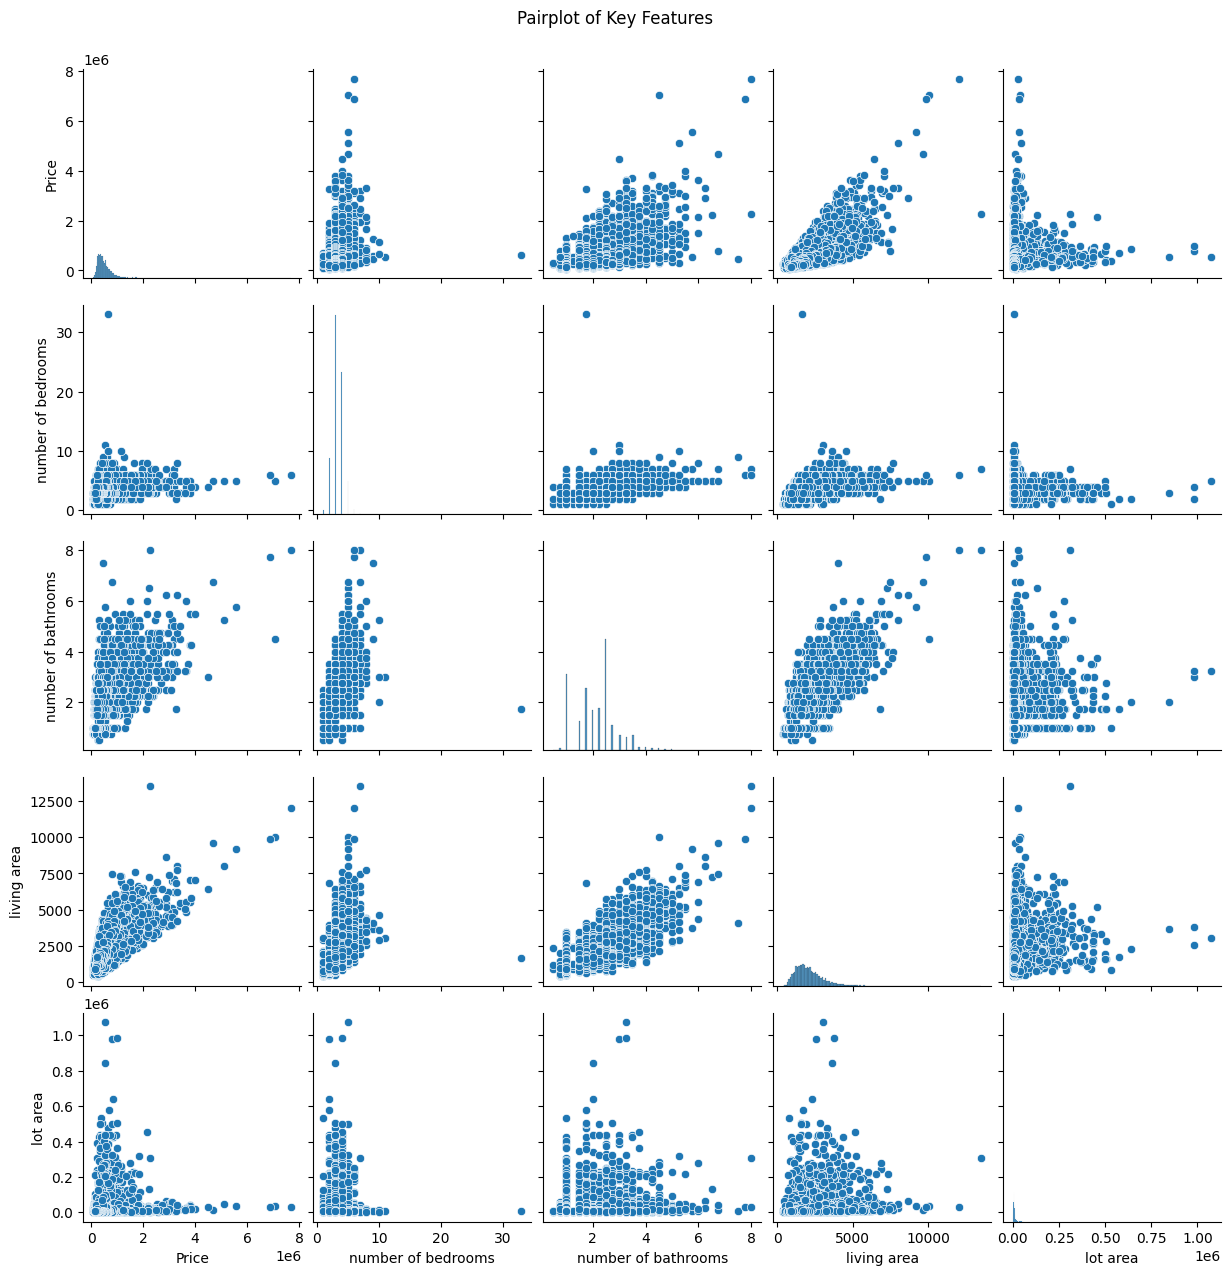

In [31]:
# Pairplot for important numerical features to visualize relationships
sns.pairplot(df[['Price', 'number of bedrooms', 'number of bathrooms', 'living area', 'lot area']])
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()

### Machine Learning 

In [ ]:
## Define the features(x) and target(y). 

x = df[['number of bathrooms', 'number of bathrooms', 'living area', 'condition of the house','Number of schools nearby']]
y = df['Price']

In [43]:
# 80% of the data for training

df.shape[0] * 0.8 

11695.2

In [44]:
## import the train_test_split function
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2) 

In [45]:
x_train.shape # 80% of the data for training

(11695, 5)

In [48]:
x_test.shape # 20%

(2924, 5)

In [49]:
# Importing GridSearchCV for hyperparameter tuning becouse we are using DecisionTreeRegressor.
from sklearn.model_selection import GridSearchCV


In [52]:
# Importing DecisionTreeRegressor becouse of the nature of the data

from sklearn.tree import DecisionTreeRegressor 
param_grid = {
    'criterion':['mse', 'friedman_mse', 'mae'],
    'splitter':['best', 'random'],
    'max_depth':[None, 10, 20, 30, 40 ,50],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf':[1, 2, 4]
}
# It are all representing the hyperparameters of the DecisionTreeRegressor.


In [55]:
# model of decisiontreeregressor.
tree_model = DecisionTreeRegressor()

In [56]:
# Create a GridSearchCV object with the DecisionTreeRegressor and the parameter grid
grid_tree = GridSearchCV(estimator = tree_model, param_grid = param_grid)

In [57]:
# Fit the model to the training data
grid_tree.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [58]:
 # This will give you the best hyperparameters found during the grid search

grid_tree.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'splitter': 'random'}

In [59]:
# Check predict of training dataset.
tree_preds = grid_tree.predict(x_test)

In [60]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, tree_preds)

161980.71611562298

In [63]:
## LinearTegression model

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [66]:
# Fit the model to the training data
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Check predict of training dataset.

predctions = lr.predict(x_test)

In [68]:
# This is the mean squared error of the predictions made by the linear regression model on the test set.

mean_absolute_error(y_test, predctions) #


167042.8757848234

In [71]:
# Using Random Forest Regressor model 
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()

In [74]:
# Parameters of Random Forest Ragressor 

param_gridrfr = {
    'max_depth':[5,10,15],
    'n_estimators':[2, 3, 4, 5, 6, 7, 8, 9, 10]
}

In [ ]:
# GridSearchCV model with ramdom forest
gridrfr = GridSearchCV(rf_model, param_gridrfr)


In [78]:
# y_train is a pandas Series or DataFrame
y_train.values.ravel()  # returns a 1D numpy array

array([1210000,  693000,  565000, ...,  325000,  336750,  646000],
      shape=(11695,))

In [76]:
gridrfr.fit(x_train, y_train.values.ravel())

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [80]:
# This will give you the best hyperparameters found during the grid search

gridrfr.best_params_ 

{'max_depth': 5, 'n_estimators': 8}

In [82]:
# Prediction 
predction = gridrfr.predict(x_test)

In [84]:
## mean absolute error value of Random Forest Regressor 
mean_absolute_error(y_test, predction)

158019.01875177576

In [ ]:
# Best Lower MAS score of RandomForestRagressor.

import joblib
joblib.dump(gridrfr, 'model.pkl') # Save the model to a file
# Load the model from the file

['model.pkl']